In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing Sklearn modules:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import *
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import sklearn.model_selection as ms
import sklearn.decomposition as de

#Importing Matplotlib:
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('chd.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4238, 16)

In [4]:
df.info()
#many of the features have missing values which needs to be replaced with either mean, median or mode values of that column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.duplicated().sum()



0

<Axes: >

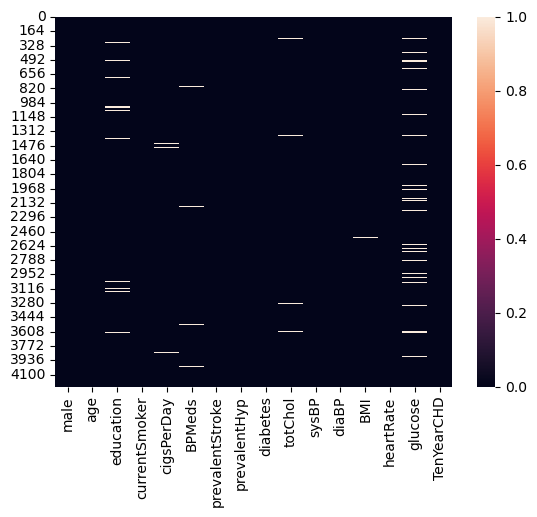

In [6]:
sns.heatmap(df.isnull())
#large amounts of null values that needs to be removed

<Axes: title={'center': 'Developing CHD in 10 years vs Not developing CHD in 10 years'}, ylabel='count'>

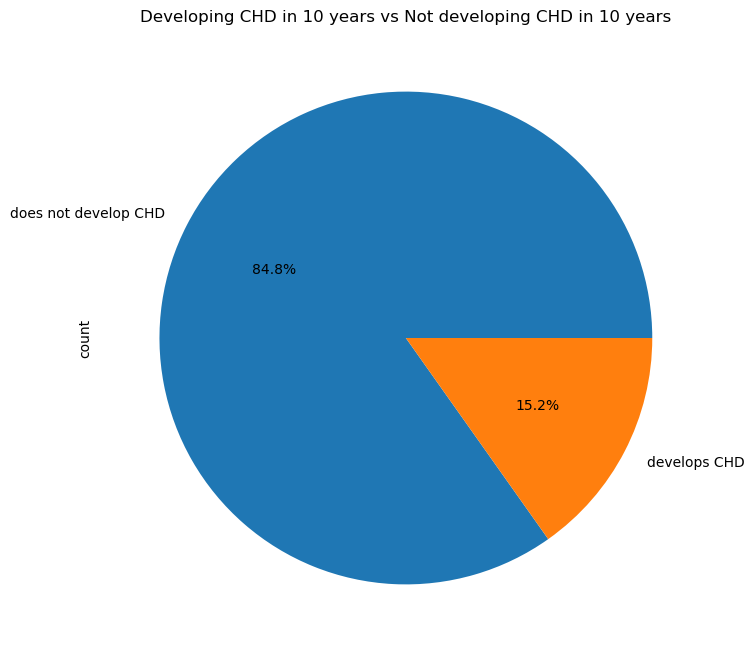

In [7]:
fig = plt.subplots(1,figsize=(8,8))
labels = 'does not develop CHD', 'develops CHD'
plt.title("Developing CHD in 10 years vs Not developing CHD in 10 years")
df.TenYearCHD.value_counts().plot.pie(labels=labels, autopct='%1.1f%%')
#from the pie chart we see that there are significantly more instances of people having ALF than those that don't have ALF

[Text(0.5, 1.0, 'Ten year CHD count')]

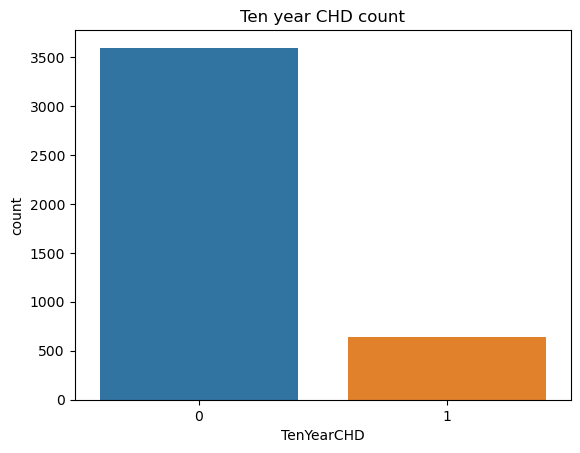

In [8]:
sns.countplot(x='TenYearCHD', data = df).set(title='Ten year CHD count')

In [9]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [10]:
missingVal=df.isnull().sum().sort_values(ascending=False)
missingVal.head(30)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

# Data PreProcessing

In [11]:
#ensure there aren't any null values present in the dataset
missing_null_vals = df.isnull().sum().sort_values(ascending=True)
missing_null_vals.head(30)
#there are almist 3000 values missing from the target feature which is likely to affect the results of implementing algorithms.
#also explains why there are so few cases of people without ALF 

male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
heartRate            1
BMI                 19
cigsPerDay          29
totChol             50
BPMeds              53
education          105
glucose            388
dtype: int64

In [12]:
df['BMI']=df['BMI'].fillna(df['BMI'].median())
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol']=df['totChol'].fillna(df['totChol'].median())
df['education']=df['education'].fillna(df['education'].median())
df['glucose']=df['glucose'].fillna(df['glucose'].median())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].median())

#drop bpMeds because it's a binary feature
df.dropna(subset=['BPMeds'], how='any', inplace=True)


<Axes: >

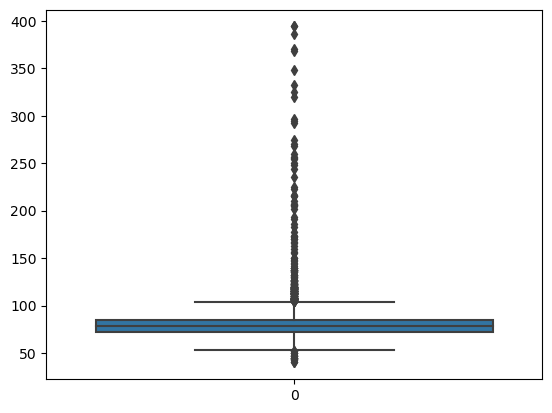

In [13]:
sns.boxplot(df['glucose'])

<Axes: >

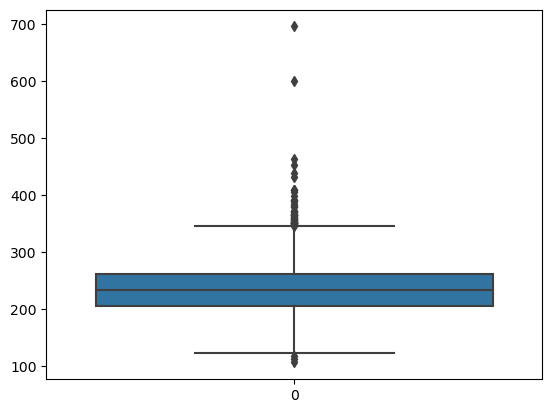

In [14]:
sns.boxplot(df['totChol'])

<Axes: >

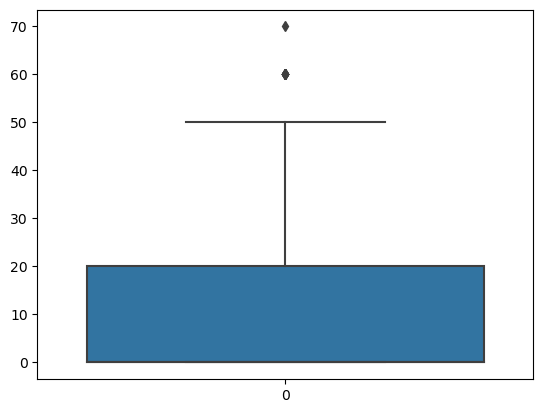

In [15]:
sns.boxplot(df['cigsPerDay'])

<Axes: >

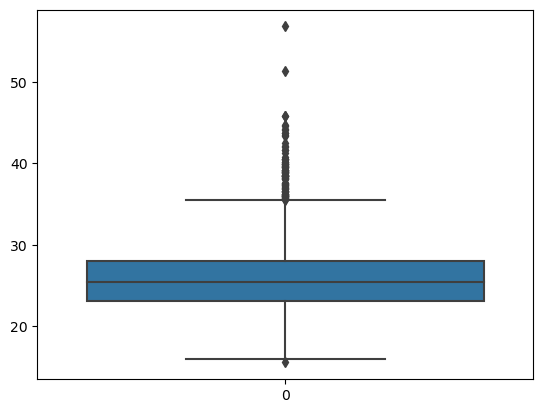

In [16]:
sns.boxplot(df['BMI'])

In [17]:
missing_null_vals = df.isnull().sum().sort_values(ascending=True)
missing_null_vals.head(30)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
X= df.drop('TenYearCHD', axis=1)
y=df['TenYearCHD']

mic = SelectKBest(score_func=mutual_info_classif, k=10)
feature_selected_x = mic.fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(feature_selected_x, y, test_size=0.3, random_state=42)

In [19]:
#Making scaled versions
scale = MinMaxScaler()
scaled_x_train= scale.fit_transform(X_train)
scaled_x_test = scale.transform(X_test)
#scaled_x_test = scale.fit_transform(X_test)


In [20]:
#SMOTE IMPLEMENTATION
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
smote_x_train, smote_y_train = smote.fit_resample(X_train, y_train)


print('smote train')
print('before: ', Counter(y_train))
print('after: ', Counter(smote_y_train))


#https://www.youtube.com/watch?v=adHqzek--d0

smote train
before:  Counter({0: 2487, 1: 442})
after:  Counter({0: 2487, 1: 2487})


In [21]:
#making oversampled dataset
df_over = df.copy()
oversample = RandomOverSampler(sampling_strategy='minority')
over_x_train, over_y_train = oversample.fit_resample(X_train, y_train)
'''over_x = df_over.drop('TenYearCHD', axis=1)
over_y = df_over['TenYearCHD']
over_x, over_y =oversample.fit_resample(over_x, over_y)
over_x_train, over_x_test, over_y_train, over_y_test = train_test_split(over_x, over_y, test_size=0.3, random_state=42)'''

"over_x = df_over.drop('TenYearCHD', axis=1)\nover_y = df_over['TenYearCHD']\nover_x, over_y =oversample.fit_resample(over_x, over_y)\nover_x_train, over_x_test, over_y_train, over_y_test = train_test_split(over_x, over_y, test_size=0.3, random_state=42)"

In [22]:
#print(over_y_test.value_counts())

In [23]:
df_under = df.copy()
undersample = RandomUnderSampler(sampling_strategy='majority')
'''under_x=df_under.drop('TenYearCHD', axis=1)
under_y = df_under['TenYearCHD']
under_x, under_y = undersample.fit_resample(under_x, under_y)'''
under_x_train, under_y_train = undersample.fit_resample(X_train, y_train)

Accuracy of the testing model: 0.8424
Accuracy of the training set: 0.8686
Mean cross fold validation score:0.8492
The classification report for this model:

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1065
           1       0.29      0.03      0.05       191

    accuracy                           0.84      1256
   macro avg       0.57      0.51      0.48      1256
weighted avg       0.77      0.84      0.78      1256

col_0          0   1
TenYearCHD          
0           1053  12
1            186   5


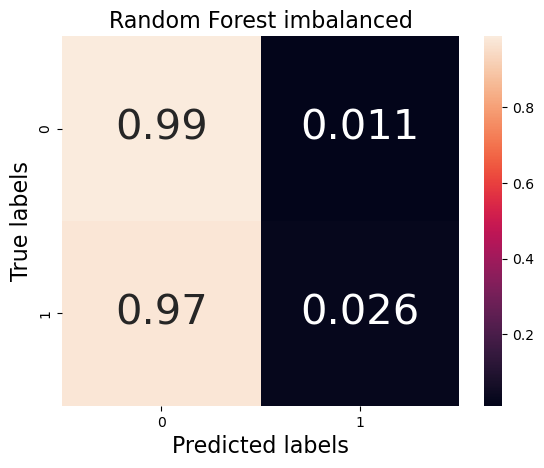

In [25]:
#Random Forest Classifier
model = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)
training_acc= model.score(X_train, y_train)
y_test_pred=model.predict(X_test)
accuracy= accuracy_score(y_test, y_test_pred)
cross_val= cross_val_score(model, X, y, cv=10, scoring='accuracy')
labels = ['0', '1']

matrix = confusion_matrix(y_test, y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('Random Forest imbalanced', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)




print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, y_test_pred, target_names=labels))
print(pd.crosstab(y_test, y_test_pred))

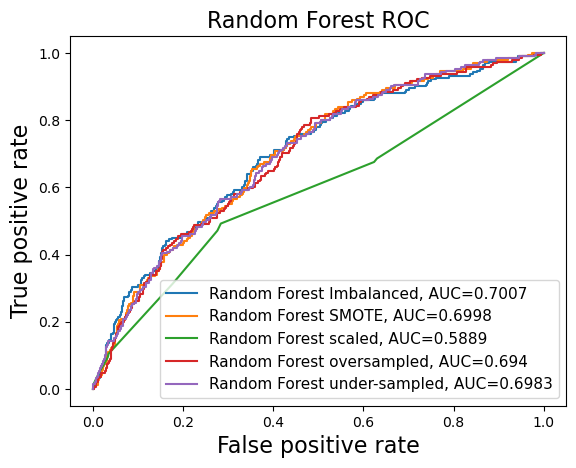

In [26]:
#Random forest ROC
model = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="Random Forest Imbalanced, AUC="+str(auc))
plt.title('Random Forest ROC', fontsize=16)

model.fit(smote_x_train, smote_y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="Random Forest SMOTE, AUC="+str(auc))

model.fit(scaled_x_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="Random Forest scaled, AUC="+str(auc))

model.fit(over_x_train, over_y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="Random Forest oversampled, AUC="+str(auc))

model.fit(under_x_train, under_y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="Random Forest under-sampled, AUC="+str(auc))

plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.legend(fontsize=11)

Accuracy of the testing model: 0.8057
Accuracy of the training set: 0.8673
Mean cross fold validation score:0.8281
The classification report for this model:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1065
           1       0.36      0.36      0.36       191

    accuracy                           0.81      1256
   macro avg       0.62      0.62      0.62      1256
weighted avg       0.81      0.81      0.81      1256



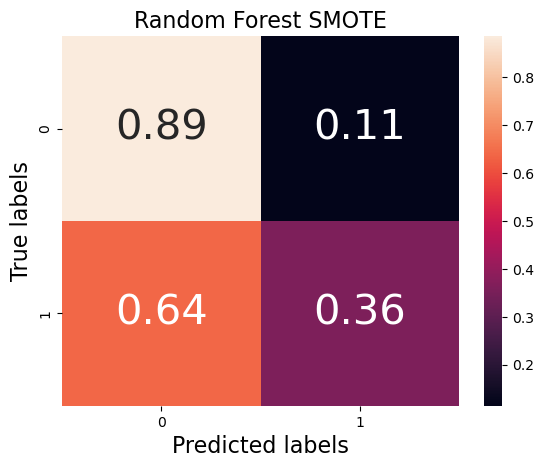

In [26]:
#Smote random forest
model = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt', random_state=42)
model.fit(smote_x_train, smote_y_train)
training_acc= model.score(smote_x_train, smote_y_train)
y_test_pred=model.predict(X_test)
accuracy= accuracy_score(y_test, y_test_pred)
cross_val= cross_val_score(model, smote_x_train, smote_y_train, cv=10, scoring='accuracy')

labels= ['0', '1']

matrix = confusion_matrix(y_test, y_test_pred, normalize='true')

fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('Random Forest SMOTE', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)


print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, y_test_pred, target_names=labels))


In [62]:
adaboostrf=AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt', random_state=42))
adaboostrf.fit(smote_x_train,smote_y_train)
y_test_pred=adaboostrf.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
labels= ['0', '1']
print(classification_report(y_test, y_test_pred, target_names=labels))

0.8200636942675159
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1065
           1       0.33      0.17      0.23       191

    accuracy                           0.82      1256
   macro avg       0.59      0.55      0.56      1256
weighted avg       0.78      0.82      0.80      1256



Accuracy of the testing model: 0.8424
Accuracy of the training set: 0.8686
Mean cross fold validation score:0.8498
The classification report for this model:

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1065
           1       0.29      0.03      0.05       191

    accuracy                           0.84      1256
   macro avg       0.57      0.51      0.48      1256
weighted avg       0.77      0.84      0.78      1256



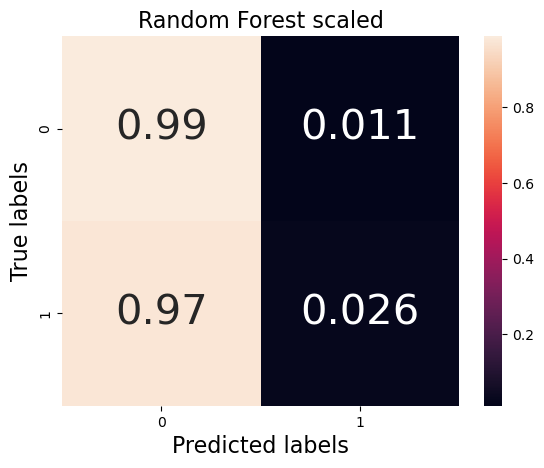

In [28]:
#Scaled random forest
model = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt', random_state=42)
model.fit(scaled_x_train, y_train)
training_acc= model.score(scaled_x_train, y_train)
y_test_pred=model.predict(scaled_x_test)
accuracy= accuracy_score(y_test, y_test_pred)
cross_val= cross_val_score(model, scaled_x_train, y_train, cv=10, scoring='accuracy')

labels= ['0', '1']

matrix = confusion_matrix(y_test, y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('Random Forest scaled', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)


print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, y_test_pred, target_names=labels))

Accuracy of the testing model: 0.7062
Accuracy of the training set: 0.8323
Mean cross fold validation score:0.7857
The classification report for this model:

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1065
           1       0.26      0.50      0.34       191

    accuracy                           0.71      1256
   macro avg       0.58      0.62      0.58      1256
weighted avg       0.80      0.71      0.74      1256



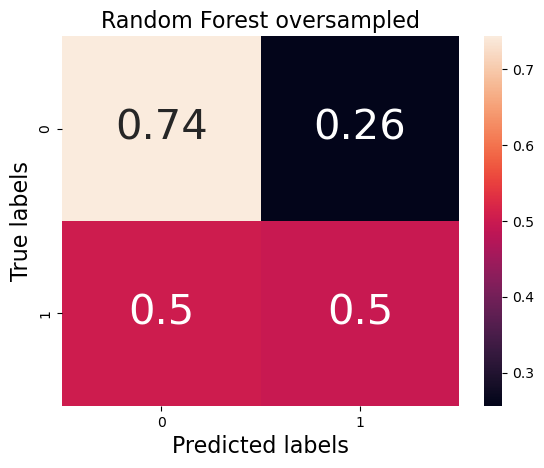

In [29]:
#oversampled random forest
model= RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt', random_state=42)
model.fit(over_x_train, over_y_train)
training_acc = model.score(over_x_train, over_y_train)
over_y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, over_y_test_pred)
cross_val = cross_val_score(model, over_x_train, over_y_train, cv=10, scoring='accuracy')

labels=['0','1']

matrix = confusion_matrix(y_test, over_y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('Random Forest oversampled', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)


print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, over_y_test_pred, target_names=labels))

Accuracy of the testing model: 0.6433
Accuracy of the training set: 0.8405
Mean cross fold validation score:0.6164
The classification report for this model:

              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1065
           1       0.24      0.60      0.34       191

    accuracy                           0.64      1256
   macro avg       0.57      0.62      0.55      1256
weighted avg       0.80      0.64      0.69      1256



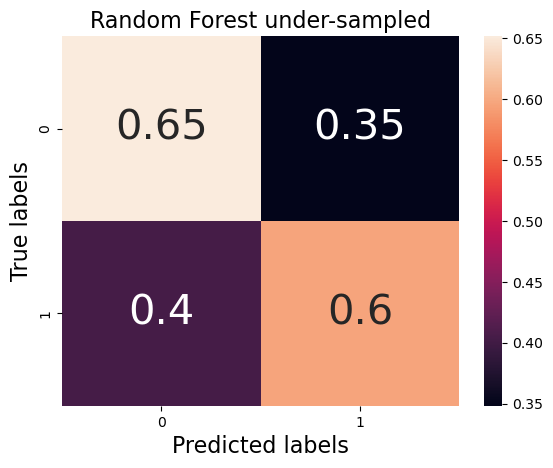

In [30]:
#undersampled random forest
model= RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt', random_state=42)
model.fit(under_x_train, under_y_train)
training_acc = model.score(under_x_train, under_y_train)
under_y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, under_y_test_pred)
cross_val = cross_val_score(model, under_x_train, under_y_train, cv=10, scoring='accuracy')

labels=['0','1']

matrix = confusion_matrix(y_test, under_y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('Random Forest under-sampled', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)



print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, under_y_test_pred, target_names=labels))

In [31]:
'''model=LogisticRegression()
model.fit(X_train, y_train)
accuracy= model.score(X_test, y_test)
training_acc= model.score(X_train, y_train)
y_test_pred=model.predict(X_test)
cross_val= cross_val_score(model, X, y, cv=5, scoring='accuracy')

labels= ['0', '1']

matrix = confusion_matrix(y_test, y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
sns.heatmap(matrix, annot=True, ax = plot)
plot.set_xlabel('Predicted labels')
plot.set_ylabel('True labels')


print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print("The classification report for this model:\n")
print(classification_report(y_test, y_test_pred, target_names=labels))'''

'model=LogisticRegression()\nmodel.fit(X_train, y_train)\naccuracy= model.score(X_test, y_test)\ntraining_acc= model.score(X_train, y_train)\ny_test_pred=model.predict(X_test)\ncross_val= cross_val_score(model, X, y, cv=5, scoring=\'accuracy\')\n\nlabels= [\'0\', \'1\']\n\nmatrix = confusion_matrix(y_test, y_test_pred, normalize=\'true\')\nfig=plt.figure()\nplot = fig.add_subplot()\nsns.heatmap(matrix, annot=True, ax = plot)\nplot.set_xlabel(\'Predicted labels\')\nplot.set_ylabel(\'True labels\')\n\n\nprint(\'Accuracy of the testing model: {:.4f}\'.format(accuracy))\nprint(\'Accuracy of the training set: {:.4f}\'.format(training_acc))\nprint("The classification report for this model:\n")\nprint(classification_report(y_test, y_test_pred, target_names=labels))'

Accuracy of the testing model: 0.8455
Accuracy of the training set: 0.8501
Mean cross fold validation score:0.8545
The classification report for this model:

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1065
           1       0.41      0.04      0.07       191

    accuracy                           0.85      1256
   macro avg       0.63      0.51      0.49      1256
weighted avg       0.78      0.85      0.79      1256

col_0          0   1
TenYearCHD          
0           1055  10
1            184   7


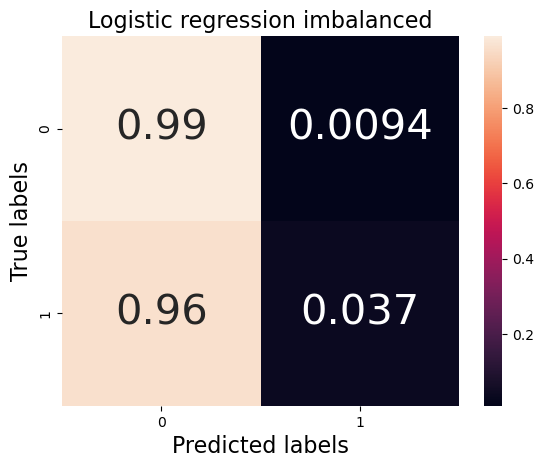

In [32]:
#Logistic regresison Classifier
model = LogisticRegression(C=100, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)
training_acc= model.score(X_train, y_train)
y_test_pred=model.predict(X_test)
accuracy= accuracy_score(y_test, y_test_pred)
cross_val= cross_val_score(model, X, y, cv=10, scoring='accuracy')

labels = ['0', '1']

matrix = confusion_matrix(y_test, y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('Logistic regression imbalanced', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)



print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, y_test_pred, target_names=labels))
print(pd.crosstab(y_test, y_test_pred))

Accuracy of the testing model: 0.6720
Accuracy of the training set: 0.6620
Mean cross fold validation score:0.6602
The classification report for this model:

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1065
           1       0.26      0.64      0.37       191

    accuracy                           0.67      1256
   macro avg       0.59      0.66      0.57      1256
weighted avg       0.81      0.67      0.72      1256

col_0         0    1
TenYearCHD          
0           722  343
1            69  122


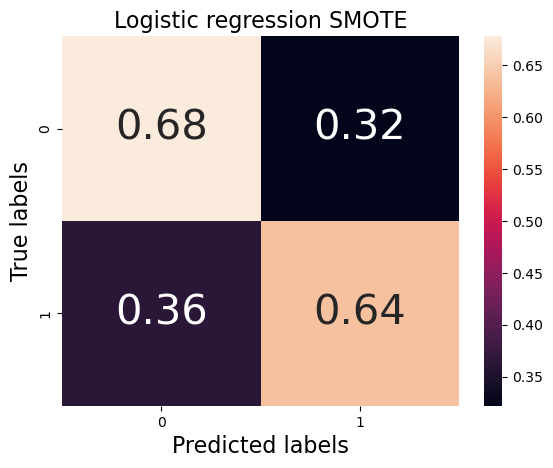

In [33]:
#Smote logistic regressions
model = LogisticRegression(C= 10, penalty= 'l2', solver= 'liblinear')
model.fit(smote_x_train, smote_y_train)
training_acc= model.score(smote_x_train, smote_y_train)
y_test_pred=model.predict(X_test)
accuracy= accuracy_score(y_test, y_test_pred)
cross_val= cross_val_score(model, smote_x_train, smote_y_train, cv=10, scoring='accuracy')

labels= ['0', '1']

matrix = confusion_matrix(y_test, y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('Logistic regression SMOTE', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)



print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, y_test_pred, target_names=labels))
print(pd.crosstab(y_test, y_test_pred))

Accuracy of the testing model: 0.8455
Accuracy of the training set: 0.8501
Mean cross fold validation score:0.8484
The classification report for this model:

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1065
           1       0.41      0.04      0.07       191

    accuracy                           0.85      1256
   macro avg       0.63      0.51      0.49      1256
weighted avg       0.78      0.85      0.79      1256



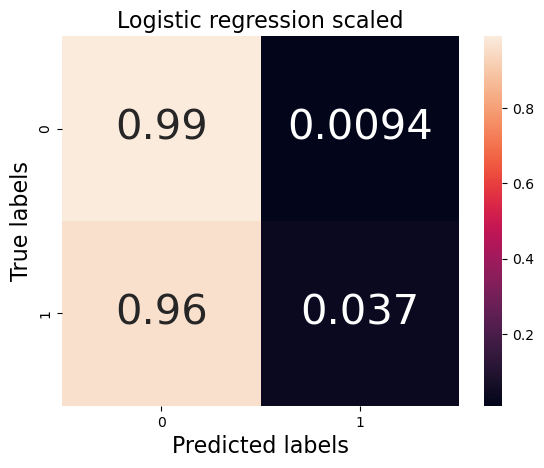

In [35]:
#scaled logistic regression
model = LogisticRegression(C=100, penalty='l2', solver='liblinear')
model.fit(scaled_x_train, y_train)
training_acc= model.score(scaled_x_train, y_train)
y_test_pred=model.predict(scaled_x_test)
accuracy= accuracy_score(y_test, y_test_pred)
cross_val= cross_val_score(model, scaled_x_train, y_train, cv=10, scoring='accuracy')

labels= ['0', '1']

matrix = confusion_matrix(y_test, y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('Logistic regression scaled', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)



print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, y_test_pred, target_names=labels))

Accuracy of the testing model: 0.6744
Accuracy of the training set: 0.6624
Mean cross fold validation score:0.6638
The classification report for this model:

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1065
           1       0.27      0.65      0.38       191

    accuracy                           0.67      1256
   macro avg       0.59      0.67      0.58      1256
weighted avg       0.82      0.67      0.72      1256



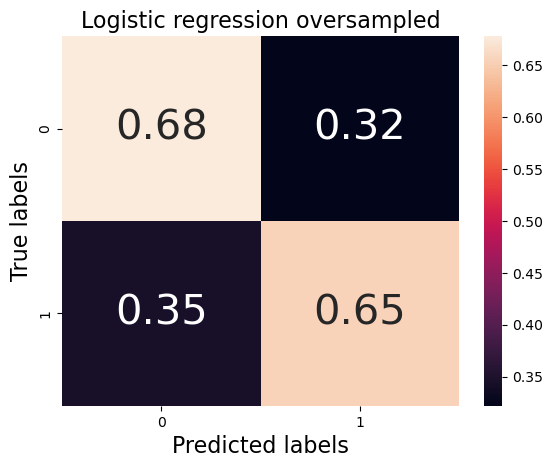

In [37]:
#oversampled logistic regression
model = LogisticRegression(C=100, penalty='l2', solver='liblinear')
model.fit(over_x_train, over_y_train)
training_acc = model.score(over_x_train, over_y_train)
over_y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, over_y_test_pred)
cross_val = cross_val_score(model, over_x_train, over_y_train, cv=10, scoring='accuracy')

labels=['0','1']

matrix = confusion_matrix(y_test, over_y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('Logistic regression oversampled', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)


print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, over_y_test_pred, target_names=labels))

Accuracy of the testing model: 0.6760
Accuracy of the training set: 0.6663
Mean cross fold validation score:0.6573
The classification report for this model:

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1065
           1       0.27      0.65      0.38       191

    accuracy                           0.68      1256
   macro avg       0.59      0.67      0.58      1256
weighted avg       0.82      0.68      0.72      1256



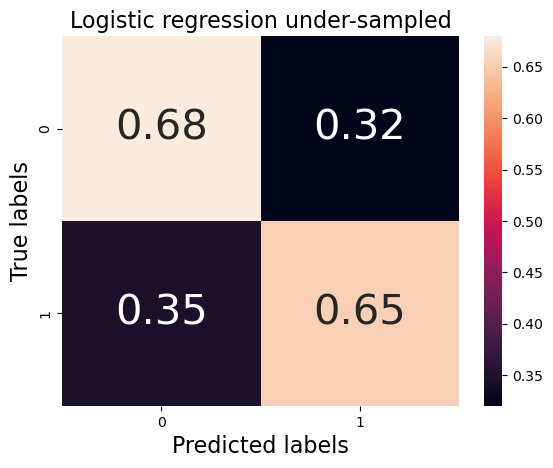

In [38]:
#undersampled random forest
model = LogisticRegression(C=100, penalty='l2', solver='liblinear')
model.fit(under_x_train, under_y_train)
training_acc = model.score(under_x_train, under_y_train)
under_y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, under_y_test_pred)
cross_val = cross_val_score(model, under_x_train, under_y_train, cv=10, scoring='accuracy')

labels=['0','1']

matrix = confusion_matrix(y_test, under_y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('Logistic regression under-sampled', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)



print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, under_y_test_pred, target_names=labels))

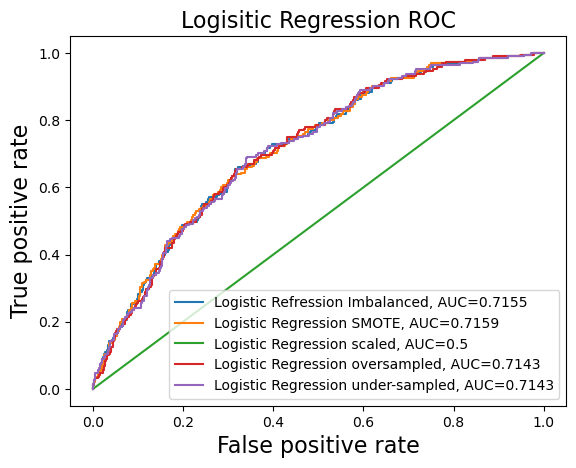

In [39]:
#Logistic regression ROC
model = LogisticRegression(C=100, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="Logistic Refression Imbalanced, AUC="+str(auc))
plt.title('Logisitic Regression ROC', fontsize=16)

model.fit(smote_x_train, smote_y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="Logistic Regression SMOTE, AUC="+str(auc))

model.fit(scaled_x_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="Logistic Regression scaled, AUC="+str(auc))

model.fit(over_x_train, over_y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="Logistic Regression oversampled, AUC="+str(auc))

model.fit(under_x_train, under_y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="Logistic Regression under-sampled, AUC="+str(auc))

plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.legend()

Accuracy of the testing model: 0.8479
Accuracy of the training set: 0.8505
Mean cross fold validation score:0.8464
The classification report for this model:

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1065
           1       0.50      0.06      0.11       191

    accuracy                           0.85      1256
   macro avg       0.68      0.53      0.51      1256
weighted avg       0.80      0.85      0.79      1256

col_0          0   1
TenYearCHD          
0           1053  12
1            179  12


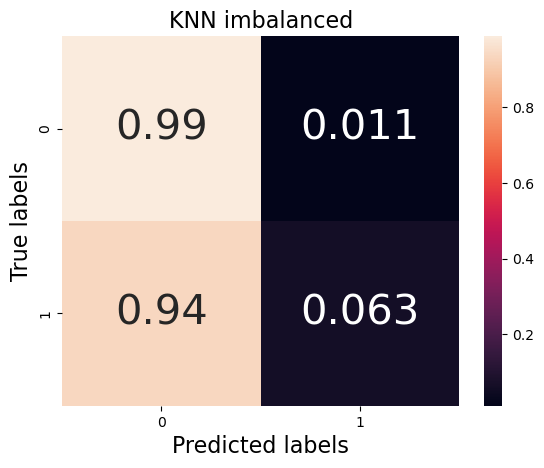

In [43]:
#KNN classifier
model = KNeighborsClassifier(algorithm='auto', n_neighbors = 15, weights='uniform')
model.fit(X_train, y_train)
training_acc= model.score(X_train, y_train)
y_test_pred=model.predict(X_test)
accuracy= accuracy_score(y_test, y_test_pred)
cross_val= cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

labels = ['0', '1']

matrix = confusion_matrix(y_test, y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('KNN imbalanced', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)



print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, y_test_pred, target_names=labels))
print(pd.crosstab(y_test, y_test_pred))

Accuracy of the testing model: 0.6162
Accuracy of the training set: 0.7923
Mean cross fold validation score:0.7493
The classification report for this model:

              precision    recall  f1-score   support

           0       0.90      0.62      0.73      1065
           1       0.22      0.60      0.32       191

    accuracy                           0.62      1256
   macro avg       0.56      0.61      0.53      1256
weighted avg       0.79      0.62      0.67      1256

col_0         0    1
TenYearCHD          
0           659  406
1            76  115


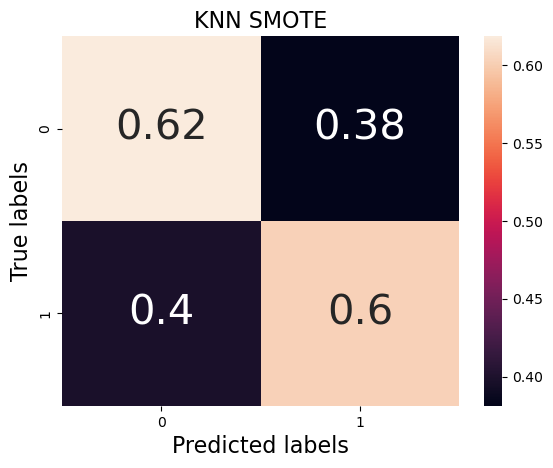

In [44]:
#Smote knn
model = KNeighborsClassifier(algorithm='auto', n_neighbors = 15, weights='uniform')
model.fit(smote_x_train, smote_y_train)
training_acc= model.score(smote_x_train, smote_y_train)
y_test_pred=model.predict(X_test)
accuracy= accuracy_score(y_test, y_test_pred)
cross_val= cross_val_score(model, smote_x_train, smote_y_train, cv=10, scoring='accuracy')

labels= ['0', '1']

matrix = confusion_matrix(y_test, y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('KNN SMOTE', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)



print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, y_test_pred, target_names=labels))
print(pd.crosstab(y_test, y_test_pred))

Accuracy of the testing model: 0.8455
Accuracy of the training set: 0.8522
Mean cross fold validation score:0.8477
The classification report for this model:

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1065
           1       0.40      0.03      0.06       191

    accuracy                           0.85      1256
   macro avg       0.63      0.51      0.49      1256
weighted avg       0.78      0.85      0.79      1256



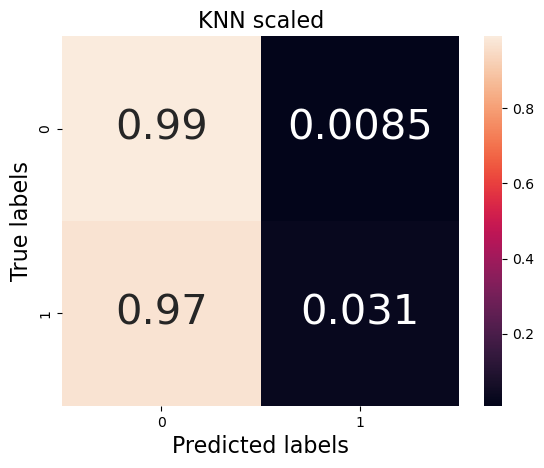

In [45]:
#scaled knn
model = KNeighborsClassifier(algorithm='auto', n_neighbors = 15, weights='uniform')
model.fit(scaled_x_train, y_train)
training_acc= model.score(scaled_x_train, y_train)
y_test_pred=model.predict(scaled_x_test)
accuracy= accuracy_score(y_test, y_test_pred)
cross_val= cross_val_score(model, scaled_x_train, y_train, cv=10, scoring='accuracy')

labels= ['0', '1']

matrix = confusion_matrix(y_test, y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('KNN scaled', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)



print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, y_test_pred, target_names=labels))

Accuracy of the testing model: 0.6298
Accuracy of the training set: 0.7274
Mean cross fold validation score:0.6840
The classification report for this model:

              precision    recall  f1-score   support

           0       0.89      0.64      0.75      1065
           1       0.22      0.57      0.32       191

    accuracy                           0.63      1256
   macro avg       0.56      0.60      0.53      1256
weighted avg       0.79      0.63      0.68      1256



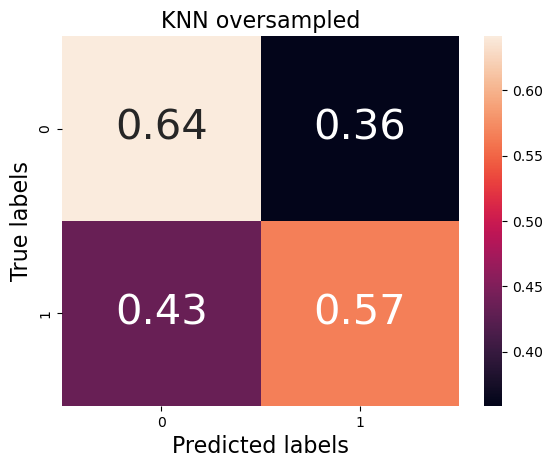

In [46]:
#oversampled knn
model= KNeighborsClassifier(algorithm='auto', n_neighbors = 15, weights='uniform')
model.fit(over_x_train, over_y_train)
training_acc = model.score(over_x_train, over_y_train)
over_y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, over_y_test_pred)
cross_val = cross_val_score(model, over_x_train, over_y_train, cv=10, scoring='accuracy')

labels=['0','1']

matrix = confusion_matrix(y_test, over_y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('KNN oversampled', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)


print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, over_y_test_pred, target_names=labels))

Accuracy of the testing model: 0.6425
Accuracy of the training set: 0.6821
Mean cross fold validation score:0.6187
The classification report for this model:

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1065
           1       0.23      0.57      0.33       191

    accuracy                           0.64      1256
   macro avg       0.56      0.61      0.54      1256
weighted avg       0.79      0.64      0.69      1256



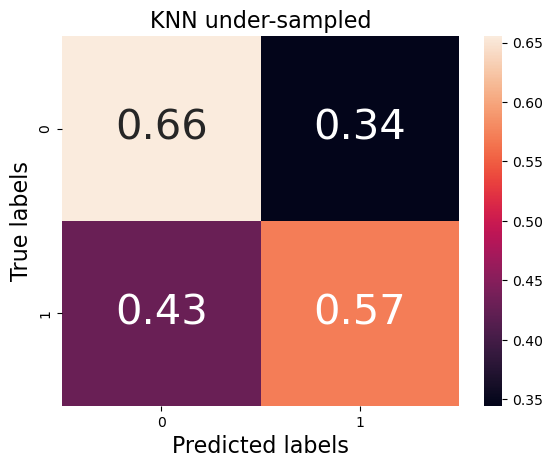

In [47]:
#undersampled random forest
model= KNeighborsClassifier(algorithm='auto', n_neighbors = 15, weights='uniform')
model.fit(under_x_train, under_y_train)
training_acc = model.score(under_x_train, under_y_train)
under_y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, under_y_test_pred)
cross_val = cross_val_score(model, under_x_train, under_y_train, cv=10, scoring='accuracy')

labels=['0','1']

matrix = confusion_matrix(y_test, under_y_test_pred, normalize='true')
fig=plt.figure()
plot = fig.add_subplot()
plot.set_title('KNN under-sampled', fontsize=16)
sns.heatmap(matrix, annot=True, annot_kws={'size':30},ax = plot)
plot.set_xlabel('Predicted labels', fontsize=16)
plot.set_ylabel('True labels', fontsize=16)



print('Accuracy of the testing model: {:.4f}'.format(accuracy))
print('Accuracy of the training set: {:.4f}'.format(training_acc))
print('Mean cross fold validation score:{:.4f}'.format(cross_val.mean()))
print("The classification report for this model:\n")
print(classification_report(y_test, under_y_test_pred, target_names=labels))

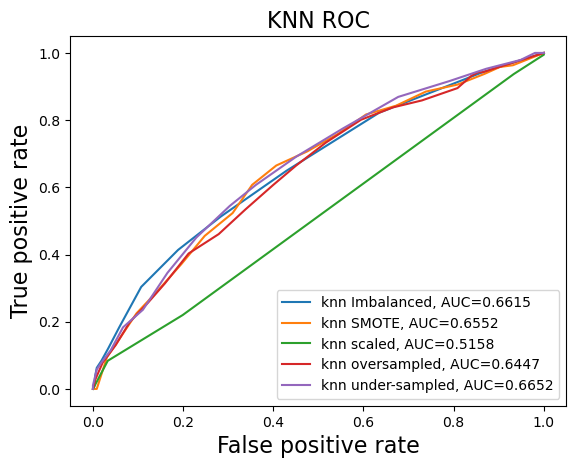

In [48]:
#KNN ROC
model = KNeighborsClassifier(algorithm='auto', n_neighbors=20, weights='uniform')
model.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="knn Imbalanced, AUC="+str(auc))
plt.title('KNN ROC', fontsize=16)

model.fit(smote_x_train, smote_y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="knn SMOTE, AUC="+str(auc))

model.fit(scaled_x_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="knn scaled, AUC="+str(auc))

model.fit(over_x_train, over_y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="knn oversampled, AUC="+str(auc))

model.fit(under_x_train, under_y_train)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),4)
plt.plot(fpr,tpr,label="knn under-sampled, AUC="+str(auc))

plt.xlabel('False positive rate', fontsize=16)
plt.ylabel('True positive rate', fontsize=16)
plt.legend()

In [53]:
#Hyperparameter tuning
#grid search with logistic regression
solvers = ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
penalties = ['l2']
c_vals = [10, 1.0, 100]
parameters = dict(solver=solvers,penalty=penalties,C=c_vals)



In [54]:
grid= GridSearchCV(LogisticRegression(max_iter=10000), parameters, cv=10, scoring='accuracy', return_train_score=False, n_jobs=-1)
grid.fit(feature_selected_x, y)
print('The best result obtained is ', grid.best_score_)
print('The parameters were ', grid.best_params_)
pd.DataFrame(grid.cv_results_)[["mean_test_score", "params"]]


The best result obtained is  0.8494627216772676
The parameters were  {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


,mean_test_score,params
0,0.848985,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}"
1,0.848746,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}"
2,0.848506,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}"
3,0.848745,"{'C': 10, 'penalty': 'l2', 'solver': 'sag'}"
4,0.848984,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}"
5,0.849463,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}"
6,0.849223,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-..."
7,0.848030,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline..."
8,0.848745,"{'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}"
9,0.848984,"{'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}"


In [55]:
#random forest grid search
criterions = ['entropy', 'gini', 'log_loss']
max_depths = [4, 2, 8, 6]
features = ['log2', 'sqrt']
parameters = dict(criterion=criterions, max_depth = max_depths, max_features=features)

In [56]:
grid = GridSearchCV(RandomForestClassifier(), parameters, cv=10, scoring='accuracy', return_train_score=False, n_jobs=-1)
grid.fit(feature_selected_x,y)
print('The best result obtained is ', grid.best_score_)
print('The parameters were ', grid.best_params_)
pd.DataFrame(grid.cv_results_)[["mean_test_score", "params"]]


The best result obtained is  0.8492240581927808
The parameters were  {'criterion': 'log_loss', 'max_depth': 4, 'max_features': 'log2'}


,mean_test_score,params
0,0.848985,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
1,0.848985,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
2,0.848746,"{'criterion': 'entropy', 'max_depth': 2, 'max_..."
3,0.848746,"{'criterion': 'entropy', 'max_depth': 2, 'max_..."
4,0.846836,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."
5,0.847790,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."
6,0.846834,"{'criterion': 'entropy', 'max_depth': 6, 'max_..."
7,0.847313,"{'criterion': 'entropy', 'max_depth': 6, 'max_..."
8,0.848985,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
9,0.848747,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."


In [57]:
#KNN grid search
neighbours = list(range(1,21))
weight=['distance', 'uniform']
algorithms = ['auto', 'kd_tree', 'brute']
parameters=dict(n_neighbors=neighbours, weights=weight, algorithm=algorithms)

In [58]:
grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, scoring='accuracy', return_train_score=False, n_jobs=-1)
grid.fit(feature_selected_x,y)
print('The best result obtained is ', grid.best_score_)
print('The parameters were ', grid.best_params_)
pd.DataFrame(grid.cv_results_)[["mean_test_score", "params"]]


The best result obtained is  0.8475499880097292
The parameters were  {'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'uniform'}


,mean_test_score,params
0,0.769404,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh..."
1,0.769404,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh..."
2,0.769404,"{'algorithm': 'auto', 'n_neighbors': 2, 'weigh..."
3,0.836557,"{'algorithm': 'auto', 'n_neighbors': 2, 'weigh..."
4,0.822217,"{'algorithm': 'auto', 'n_neighbors': 3, 'weigh..."
...,...,...
115,0.846116,"{'algorithm': 'brute', 'n_neighbors': 18, 'wei..."
116,0.846355,"{'algorithm': 'brute', 'n_neighbors': 19, 'wei..."
117,0.846355,"{'algorithm': 'brute', 'n_neighbors': 19, 'wei..."
118,0.847549,"{'algorithm': 'brute', 'n_neighbors': 20, 'wei..."
